# MathLab Project
## Avisa Fallah
## 610398208



## Goal
In this assignment, we're going to train a neural network on a handwritten persian digits dataset. Let's start!

## Overall approach
In order to train the network, we first need to read the datasets, then apply some preprocessing and after that, train the model and see the impact of hyperparameters on the accuracy of the model. Let's import some useful libraries:

### Libraries

In [ ]:
import cv2
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import random

Let's import the dataset using pickle:

### Read pkl files

In [ ]:
pkl_data = open('data.pkl', 'rb')
pkl_labels = open('labels.pkl', 'rb')

data = pickle.load(pkl_data)
labels = pickle.load(pkl_labels)

## Section 1: Preprocessing

### 1. Showing a random image

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255,   0],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0, 255, 255]], dtype=uint8)

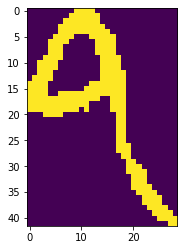

In [ ]:
random_num = random.randint(0,len(data) - 1)
plt.imshow(data[random_num])
data[random_num]

### 2.Resizing all images

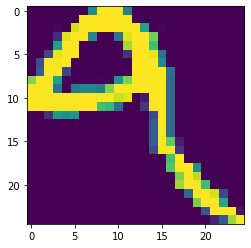

In [ ]:
import cv2

resized_data = []

for img in data:
    resized_data.append(cv2.resize(img, dsize=(25, 25), interpolation=cv2.INTER_CUBIC))

plt.imshow(resized_data[random_num])

### 3. Images of each class(numbers 0 to 9)

Image of class 0


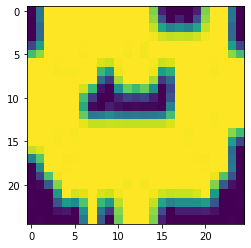

Image of class 1


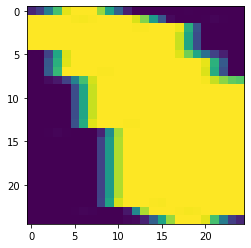

Image of class 2


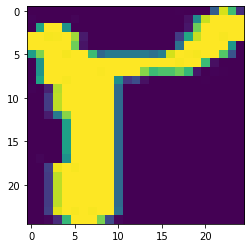

Image of class 3


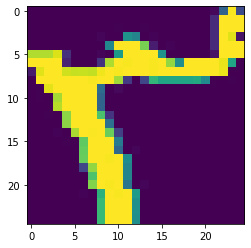

Image of class 4


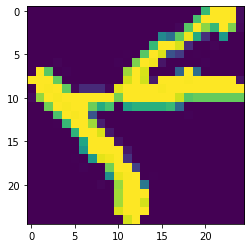

Image of class 5


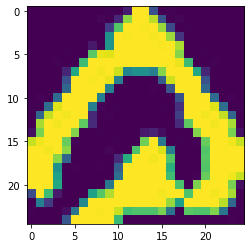

Image of class 6


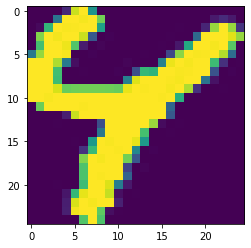

Image of class 7


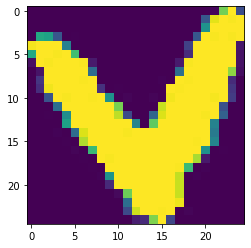

Image of class 8


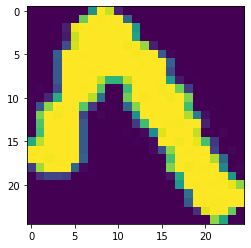

Image of class 9


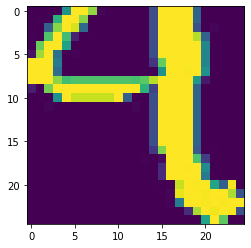

In [ ]:
for i in range(0, 10):
    index = labels.index(i)
    print("Image of class", i)
    plt.imshow(resized_data[index])
    plt.show()

### split train and test data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.DataFrame(columns = ['image', 'label'])

df['image'] = resized_data
df['label'] = labels

display(df)

x_train, x_test, yy_train, yy_test = train_test_split(df[['image']], df['label'], test_size=0.2, random_state=42)
display(x_train)
display(yy_train)
display(x_test)
display(yy_test)


,image,label
0,"[[0, 0, 0, 0, 29, 235, 255, 132, 0, 0, 0, 0, 0...",6
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 20, 255, 25...",5
2,"[[0, 99, 255, 255, 255, 255, 255, 255, 255, 25...",0
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",7
...,...,...
102347,"[[0, 0, 0, 0, 0, 0, 144, 237, 29, 0, 0, 0, 0, ...",6
102348,"[[0, 0, 11, 89, 173, 237, 253, 209, 131, 46, 0...",1
102349,"[[0, 0, 0, 1, 2, 0, 0, 0, 0, 95, 246, 255, 255...",0
102350,"[[0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 161, ...",8


,image
68352,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 55..."
8790,"[[0, 0, 0, 8, 65, 147, 226, 255, 255, 255, 201..."
76265,"[[0, 0, 0, 0, 0, 0, 0, 0, 101, 255, 225, 17, 0..."
53786,"[[255, 255, 255, 248, 148, 42, 0, 0, 0, 0, 0, ..."
90256,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...
6265,"[[0, 0, 0, 0, 0, 0, 0, 1, 0, 39, 255, 255, 255..."
54886,"[[11, 55, 166, 250, 220, 111, 19, 0, 1, 0, 0, ..."
76820,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 113, 255, 255,..."
860,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 29, 45, 255, 2..."


68352    4
8790     1
76265    8
53786    1
90256    7
        ..
6265     5
54886    1
76820    8
860      9
15795    8
Name: label, Length: 81881, dtype: int64

,image
90439,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5,..."
55194,"[[0, 0, 12, 69, 183, 255, 189, 50, 0, 0, 0, 0,..."
49340,"[[0, 40, 138, 236, 255, 255, 236, 140, 41, 0, ..."
76916,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 222, 110, 0, 0..."
1045,"[[0, 6, 16, 18, 16, 16, 18, 16, 6, 0, 0, 0, 0,..."
...,...
94512,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 246, 255,..."
95609,"[[0, 0, 0, 0, 0, 1, 6, 12, 36, 87, 147, 206, 2..."
62924,"[[0, 150, 255, 251, 60, 0, 0, 0, 0, 0, 0, 0, 0..."
96623,"[[2, 2, 0, 0, 0, 0, 0, 0, 29, 86, 148, 207, 25..."


90439    4
55194    1
49340    1
76916    8
1045     2
        ..
94512    4
95609    1
62924    1
96623    1
34690    3
Name: label, Length: 20471, dtype: int64

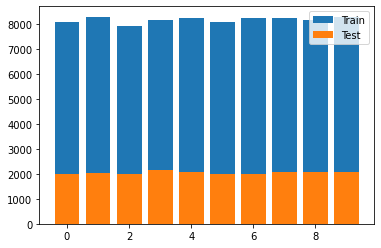

In [ ]:
from collections import Counter

plt.bar(*zip(*Counter(yy_train).items()), label='Train')
plt.bar(*zip(*Counter(yy_test).items()), label='Test')
plt.legend()
plt.show()

### Counts for train and test

In [ ]:
import numpy as np

print("Counts for train: ")
print(yy_train.value_counts(sort = True))
    
print("\nCounts for test: ")
print(yy_test.value_counts(sort = True))

Counts for train: 
9    8307
1    8298
7    8274
4    8266
6    8252
3    8191
8    8175
5    8097
0    8082
2    7939
Name: label, dtype: int64

Counts for test: 
3    2143
8    2089
7    2089
4    2067
9    2064
1    2032
5    2013
6    2002
0    1988
2    1984
Name: label, dtype: int64


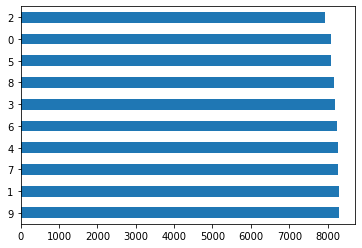

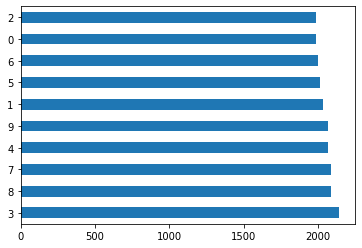

In [ ]:
count_train = yy_train.value_counts(sort=True)
count_train.plot.barh()
plt.show()

count_test = yy_test.value_counts(sort=True)
count_test.plot.barh()
plt.show()

### Normalization

In [ ]:
flatten_train = []
for img in x_train['image']:
    flatten_train.append(img.flatten())
    
flatten_test = []
for img in x_test['image']:
    flatten_test.append(img.flatten())

x_train = pd.DataFrame(data = np.divide(flatten_train, 255))
x_test = pd.DataFrame(data = np.divide(flatten_test, 255))

y_train = pd.DataFrame()
y_test = pd.DataFrame()

y_train['label'] = yy_train
y_test['label'] = yy_test


In [ ]:
display(x_train.head())
display(y_train.head())

display(x_test.head())
display(y_test.head())

,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,622,623,624
0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.215686,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0
1,0.0,0.0,0.0,0.031373,0.254902,0.576471,0.886275,1.0,1.000000,1.0,...,1.000000,1.0,1.000000,0.886275,0.572549,0.25098,0.035294,0.00000,0.003922,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.396078,1.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0
3,1.0,1.0,1.0,0.972549,0.580392,0.164706,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.270588,0.698039,1.000000,1.00000,1.000000,0.65098,0.223529,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0


,label
68352,4
8790,1
76265,8
53786,1
90256,7


,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,622,623,624
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.184314,0.862745,0.827451,0.152941,0.0,0.00000,0.000000,0.000000,0.0
1,0.0,0.000000,0.047059,0.270588,0.717647,1.000000,0.741176,0.196078,0.000000,0.0,...,0.494118,0.843137,1.000000,1.000000,1.000000,1.0,1.00000,1.000000,1.000000,1.0
2,0.0,0.156863,0.541176,0.925490,1.000000,1.000000,0.925490,0.549020,0.160784,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.92549,0.541176,0.156863,0.0
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0
4,0.0,0.023529,0.062745,0.070588,0.062745,0.062745,0.070588,0.062745,0.023529,0.0,...,0.176471,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0


,label
90439,4
55194,1
49340,1
76916,8
1045,2


# Dataloader
This class prepares the dataset for the neural network.


In [ ]:
class Dataloader:
    '''
    This class prepares the dataset for the neural network.
    '''
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):
        '''
        This is the constructor. It gets dataset information and initializes the 
        Dataloader class fields.
            Parameters:
                data: features your dataset in pandas.Dataframe format.
                labels: labels of your dataset in pandas.Dataframe format.
                n_classes: number of classes you have in your dataset.
                batch_size: the number of samples that will be propagated through the network.
                shuffle: boolean value indicating whether or not the dataset should be shuffled
        '''

        assert len(data)==len(labels)

        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        '''
        This private method gets labels and provides one_hot vectors of labels.
        For categorical variables where no such ordinal relationship exists,
        the integer encoding is not enough.
        In this case, a one-hot encoding can be applied to the integer representation.
        This is where the integer encoded variable is removed, and a new binary variable is
        added for each unique integer value.
        example:
            red,    green,    blue
            1,      0,        0
            0,      1,        0
            0,      0,        1
                Parameters:
                        label: lables of your dataset in pandas.Dataframe format.
                        n_classes: number of classes you have in your dataset.
                
                Returns:
                    onehot_vectors: onehot vectors of the labels
        '''
        onehot_vectors = pd.DataFrame(OneHotEncoder().fit_transform(labels).toarray())
        return onehot_vectors
    
    def __shuffle_dataset(self):
        '''
        This private method shuffles your dataset.
        It uses data and onehot_labels to shuffle them
        symmetrical.
        '''
        perm = np.random.permutation((self.__data.shape[0]))
        self.__data = self.__data[perm]
        self.__onehot_labels = self.__onehot_labels[perm]

    def __iter__(self):
        '''
        The __iter__() function returns an iterator for the
        given object (array, set, tuple, etc., or custom objects).
        This will return your dataset in the batch_size given. This should
        be used to provide data for the neural network.
        '''
        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return

        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

# Activation Functions

In [ ]:
class Identical:
    '''
    This is the Identical activation function. This activation function just
    return the value it gets.
    '''
    
    def __init__(self):
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass

    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        As this is an identical activity function, it just 
        returns np.matrix of the input.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_value: np.matrix of input with float datatypes
        '''
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        '''
        This method returns the derivation of the input.
        As the derivation of x is one, this method returns
        a matrix of one with the shape of the input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_derivative: np.matrix of ones with matrix shape
        '''
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _value method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)
    

class Relu:
    '''
    This is the Relu activation function. 
    The rectified linear activation function or ReLU for short
    is a piecewise linear function that will output the input directly
    if it is positive, otherwise, it will output zero.
    '''
    
    def __init__(self): 
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass
        
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set 0 in the matrix if the value is less than 0 else, it returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        temp = np.matrix(matrix, dtype=float)
        relu_value = np.maximum(0, temp)
        return relu_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_derivative: np.matrix of relu activation function derivation result
        '''
        temp = np.matrix(matrix, dtype=float)
        relu_derivative = np.matrix(np.full(np.shape(temp), np.where(temp >= 0, 1, 0)))
        return relu_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _relu method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __relu(matrix): __relu return value for the input matrix
        '''
        return self.__val(matrix)

    
class LeakyRelu:
    '''
    This is the Leaky Relu activation function. 
    Leaky Rectified Linear Unit, or Leaky ReLU,
    is a type of activation function based on a ReLU,
    but it has a small slope for negative values instead
    of a flat slope.
    '''
    
    def __init__(self, negative_slope=0.01):
        '''
        This is the constructor.
        It sets negative_slope field.
            Parameters:
                negative_slope: slope for negative input values
        '''
        self.negative_slope = negative_slope
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set negative_slope*value in the matrix if the value is less than 0, else it
        returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        temp = np.matrix(matrix, dtype=float)
        leaky_relu_value = np.where(temp < 0, temp * self.negative_slope, temp)
        return leaky_relu_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of leaky relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                leacky_relu_derivative: np.matrix of leaky relu activation function derivation result
        '''
        temp = np.matrix(matrix, dtype=float)
        leaky_relu_derivative = np.matrix(np.full(np.shape(temp), np.where(temp >= 0, 1, self.negative_slope)))
        return leaky_relu_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

    
class Sigmoid:
    '''
    A sigmoid function is a mathematical function having a
    characteristic "S"-shaped curve or sigmoid curve.
    It return S(x)=1/(1+e^-x)
    '''
    
    def __init__(self): 
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass

    def __val(self, matrix):
        '''
        Returns 1/(1+e^-x) of values
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_value: np.matrix of sigmoid activation function result
        '''
        temp = np.matrix(matrix, dtype=float)
        sigmoid_value = 1/(1 + np.exp(-temp))
        return sigmoid_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of sigmoid function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of sigmoid activation function derivation result
        '''
        temp = np.matrix(matrix, dtype=float)
        temp = self.__val(temp)
        sigmoid_derivative = np.multiply(temp, (1 - temp))
        return sigmoid_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)


class Softmax:
    '''
    The softmax function, also known as softargmax  or normalized
    exponential function is a generalization of the logistic
    function to multiple dimensions. It is used in multinomial logistic
    regression and is often used as the last activation function of a neural
    network to normalize the output of a network to a probability distribution
    over predicted output classes, based on Luce's choice axiom.
    Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
    '''
        
    def __init__(self): 
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass
        

    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the softmax on that.
        Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                softmax_value: np.matrix of softmax activation function result
        '''
        temp = np.matrix(matrix, dtype=float)    
        softmax_value = np.apply_along_axis(lambda row: np.exp(row - np.max(row))/np.sum(np.exp(row - np.max(row))), 1, temp)
        return softmax_value
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)
    
class Tanh:
    '''
    tanh is also like logistic sigmoid but better. 
    The range of the tanh function is from (-1 to 1).
    tanh is also sigmoidal (s - shaped).
    '''
    
    def __init__(self): 
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass

    def __val(self, matrix): # check
        '''
        This private method gets a matrix and uses the activity function on that.
        It performs Tanh on the values.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                tanh_value: np.matrix of Tanh activation function result
        '''
        temp = np.matrix(matrix, dtype=float)
        tanh_value = np.tanh(temp)
        tanh_value = np.matrix(tanh_value)
        return tanh_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of Tanh function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of Tanh activation function derivation result
        '''
        temp = np.matrix(matrix, dtype=float)
        tanh_derivative = 1 - np.power(self.__val(temp), 2)
        return tanh_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

![image.png](attachment:image.png)


# Loss Function

In [ ]:
class CrossEntropy: #(with softmax)
    '''
    Cross-entropy is a measure of the difference between two probability
    distributions for a given random variable or set of events. You might
    recall that information quantifies the number of bits required to encode
    and transmit an event.
    The above image can help you.
    '''
    
    def __init__(self): 
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass

    def __val(self, true_val, expected_val):
        '''
        L(y^, y) = - Σ (y^(k)log (y^)^(k)) for k in K
        Parameters:
            true_val: calculated values (generated by neural network)
            expected_val: real values in dataset
        Returns:
            cross_entropy_value: cross entropy of inputs
        '''
        assert np.shape(true_val)==np.shape(expected_val)
        
        temp = np.matrix(true_val, dtype=float)
        output = np.log(Softmax()(temp))
        expected = np.matrix(expected_val, dtype=float)
        
        cross_entropy_value =  -1 * np.sum(np.multiply(expected, output), axis=1)
        
        return cross_entropy_value
    
        
    def derivative(self, true_val, expected_val):
        '''
        Returns derivation of cross entropy.
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                cross_entropy_derivative: cross entropy derivation of inputs
        '''
        assert np.shape(true_val)==np.shape(expected_val)
                                           
        temp = np.matrix(true_val, dtype=float)
        output = Softmax()(temp)
        expected = np.matrix(expected_val, dtype=float)
                                           
        cross_entropy_derivative = output - expected
                                           
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(true_val, expected_val)

# Layer

In [ ]:
class Layer:
    '''
    The layer class is used to define neural network layers.
    It stores all needed information for each layer, such as neurons count,
    weight matrix, bias, the output after applying the activation function, etc.
    '''

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, activation=Identical(), initial_weight='uniform', 
                 **initializing_parameters):
        '''
        Parameters:
            input_size: the size of the input of this layer.
            output_size: the size of the output after this layer.
            activation: the activation function. It can be initialized to either of the previously defined activation classes.
                               default is an Identical activation function.
            initial_weight: either normal or uniform. It defines the method for weight initialization.
        '''
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 
                                          'normal':self.__normal_weight, 
                                          'zero':self.__zero_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'


        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        '''
        It calculates the output of this layer for the layer_input argument.
        This method also stores __last_input, __last_activation_input, and __last_activation_derivative
        for future use in backpropagation.
        Parameters:
            layer_input: 2d np.matrix representing the input matrix of this layer.
        Returns:
            Final output of this layer after applying the activation function.
        '''
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        
        self.__last_input = np.matrix(layer_input, dtype=float)
        self.__last_activation_input = np.add(np.dot(self.__last_input, self.__weight), self.__bias)

        self.__last_activation_output = self.__activation(self.__last_activation_input)

        self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_input)        
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        '''
        It updates Layer weights according to the backpropagation matrix and learning rate.
        This method updates bias values as well.
        Parameters:
            backprop_tensor: 2d np.matrix passed from the next layer containing gradient values.
            lr: learning rate
        Returns:
            backprop_tensor to be used by the previous layer.
        '''
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
        
        ones = np.matrix(np.ones((np.size(backprop_tensor,axis=0), 1)))

        dy = np.multiply(backprop_tensor, self.__last_activation_derivative)
        db = np.matmul(ones.T, dy)
        dw = np.matmul(self.__last_input.T, dy)
        
        backprop_tensor = np.matmul(dy, np.transpose(self.__weight))

        self.__weight -= lr * dw
        self.__bias -= lr * db
        
        return backprop_tensor

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a uniform distribution between low and high values.
        It uses default low and high values unless low or high are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom low or high values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using uniformly distributed values.
        '''
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        
        weights = np.matrix(np.random.uniform(low, high, size=(dim1, dim2)))
        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a normal distribution with mean and var values.
        It uses default mean and variance values unless mean or var are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom mean or var values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using normaly distributed values.
        ''' 
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        weights = np.matrix(np.random.normal(mean, np.sqrt(var), size=(dim1, dim2)))
        return weights
    
    # Not necessary
    def __zero_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as 0.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
        Returns:
            np.matrix with size (dim1, dim2) initialized using 0 values.
        ''' 
        weights = np.matrix(np.zeros(shape=(dim1,dim2)))
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

# Feed Forward Neural Network

In [ ]:
class FeedForwardNN:
    '''
    This class is used in order to implement custom feed-forward neural networks.
    The FeedForwardNN class stores a list of layers that determines all network layers.
    It also consists of the learning rate and loss function.
    '''
    def __init__(self, input_shape):
        '''
        Parameters:
            input_shape: the size of the first input to our neural network.
        '''
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
        '''
         This method adds a new custom layer to the layers_list.
         Parameters:
             n_neurons: number of neurons in this layer
             activation: the activation function of this layer, default is Relu
             initial_weight: either a uniform or normal, default is uniform
             initializing_parameters: other initializing parameters such as low, high, mean, var, etc
        '''
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        '''
        This method is used to set training parameters.
        Parameters:
            loss: loss function, default is CrossEntropy
            lr: learning rate, default is 1e-3
        '''
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        '''
        This method calculates the output of the complete neural network for a passed input.
        Parameters:
            network_input: input of the neural network
        Returns:
            network_output: output of the neural network after forwarding the network_input
        '''
        assert type(self.__output_shape) != None, "Model is not compiled!"

        network_output = network_input
        for layer in self.__layers_list:
            network_output = layer.forward(network_output)
        
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        '''
        This method trains the neural network using specified parameters.
        It runs the __train private method epoch times and fills the log dictionary.
        Parameters:
            epochs: number of epochs to run
            trainloader: DataLoader for train data
            testloader: DataLoader for test data
            print_results: whether or not to print the results
        Returns:
            log: complete log of the training process as a dictionary consisting of
            train_accuracy, train_loss, test_accuracy, test_loss
        '''
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader):
        '''
        Trains the neural network for one epoch.
        Parameters:
            trainloader: A DataLoader consisting of train data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        batch_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            batch_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(batch_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        '''
        Test the neural network using a testloader.
        Parameters:
            testloader: A DataLoader of test data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        batch_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            batch_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)

        return np.mean(batch_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        '''
        Trains the neural network for one batch of train data.
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''
        network_output = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(network_output, y_batch)
        batch_average_loss = np.mean(self.__loss(network_output, y_batch))

        self.__update_weights(network_output, y_batch)

        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch):
        '''
        Tests the neural network for one batch of test data.
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''  
        network_output = self.forward(x_batch)

        batch_accuracy = self.__compute_accuracy(network_output, y_batch)
        batch_average_loss = np.mean(self.__loss(network_output, y_batch))
        
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        '''
        Parameters:
            outputs: output of the neural network
        Returns:
            labels: labels generated from the outputs of the neural network
        '''
        labels = outputs.argmax(1)
        return labels
    
    
    def __compute_accuracy(self, output, expected_output):
        '''
        Computes accuracy by comparing output and expected_output.
        Parameters:
            output: actual output of the neural network
            expected_output: expected output
        Returns:
            accuracy
        '''
        labels = self.__get_labels(output)
        expected_labels = self.__get_labels(expected_output)
        accuracy = np.count_nonzero(labels == expected_labels) / np.size(output, axis=0) * 100
        return accuracy
    
    
    def __update_weights(self, output, y_train):
        '''
        Updates weights of all layers according to neural network output and labels.
        Parameters:
            output: output of the neural network
            y_train: y labels for one batch of train data
        Returns:
            None
        '''
        backpropagation_tensor = self.__loss.derivative(output, y_train)
        for layer in reversed(self.__layers_list):
            backpropagation_tensor = layer.update_weights(backpropagation_tensor, self.__lr)
        return

## Section 3: Data classification

### Training Network

In [ ]:
INPUT_SHAPE = 25*25
LEARNING_RATE = 0.001
EPOCHS = 15
BATCH_SIZE = 32

In [ ]:
TRAINLOADER = [batch for batch in Dataloader(x_train, y_train, n_classes=10, batch_size=BATCH_SIZE, shuffle=False)]
TESTLOADER = [batch for batch in Dataloader(x_test, y_test, n_classes=10, batch_size=BATCH_SIZE, shuffle=False)]

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(50, activation=Relu(), initial_weight='uniform')
network.add_layer(10, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results=True)

Epoch 1:
	Train: Average Accuracy: 90.42106291520125	Average Loss: 0.38544905171842586
	Test: Average Accuracy: 95.56449558423913	Average Loss: 0.1587077819408679
Epoch 2:
	Train: Average Accuracy: 96.24242868307932	Average Loss: 0.1363473863440764
	Test: Average Accuracy: 96.53617527173913	Average Loss: 0.12617858288913544
Epoch 3:
	Train: Average Accuracy: 97.11190894880812	Average Loss: 0.10706149170144062
	Test: Average Accuracy: 97.10746433423913	Average Loss: 0.10350292274388359
Epoch 4:
	Train: Average Accuracy: 97.60648690894881	Average Loss: 0.08726448315953986
	Test: Average Accuracy: 97.51762058423913	Average Loss: 0.08886592457283862
Epoch 5:
	Train: Average Accuracy: 97.95940797186401	Average Loss: 0.07385514841829192
	Test: Average Accuracy: 97.75199558423913	Average Loss: 0.07956214585175883
Epoch 6:
	Train: Average Accuracy: 98.21951934349356	Average Loss: 0.06425634485515382
	Test: Average Accuracy: 97.88383152173913	Average Loss: 0.07298698502545697
Epoch 7:
	Train: A

[Text(0.5, 0, 'epochs')]

<Figure size 432x288 with 0 Axes>

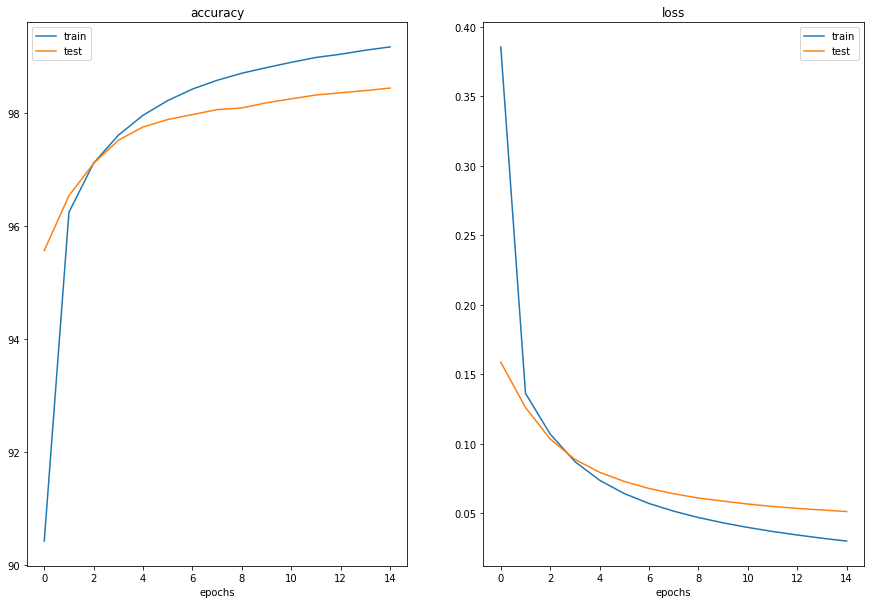

In [ ]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(15,10))
axes[0].plot(log['train_accuracy'])
axes[0].plot(log['test_accuracy'])
axes[0].legend(['train', 'test'])
axes[0].set_title("accuracy")
axes[0].set(xlabel='epochs')

axes[1].plot(log['train_loss'])
axes[1].plot(log['test_loss'])
axes[1].legend(['train', 'test'])
axes[1].set_title("loss")
axes[1].set(xlabel='epochs')


### Zero Weighting

In [ ]:
TRAINLOADER = [batch for batch in Dataloader(x_train, y_train, n_classes=10, batch_size=BATCH_SIZE, shuffle=False)]
TESTLOADER = [batch for batch in Dataloader(x_test, y_test, n_classes=10, batch_size=BATCH_SIZE, shuffle=False)]

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(50, activation=Relu(), initial_weight='zero')
network.add_layer(10, activation=Identical(), initial_weight='zero')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results=True)

Epoch 1:
	Train: Average Accuracy: 10.082747166862056	Average Loss: 2.3027821567506788
	Test: Average Accuracy: 10.20210597826087	Average Loss: 2.302601387404046
Epoch 2:
	Train: Average Accuracy: 10.08152598671356	Average Loss: 2.302778478897865
	Test: Average Accuracy: 10.20210597826087	Average Loss: 2.3026014440218434
Epoch 3:
	Train: Average Accuracy: 10.08152598671356	Average Loss: 2.30277848153859
	Test: Average Accuracy: 10.20210597826087	Average Loss: 2.302601444037573
Epoch 4:
	Train: Average Accuracy: 10.08152598671356	Average Loss: 2.3027784815394607
	Test: Average Accuracy: 10.20210597826087	Average Loss: 2.3026014440375775
Epoch 5:
	Train: Average Accuracy: 10.08152598671356	Average Loss: 2.302778481539461
	Test: Average Accuracy: 10.20210597826087	Average Loss: 2.3026014440375775
Epoch 6:
	Train: Average Accuracy: 10.08152598671356	Average Loss: 2.302778481539461
	Test: Average Accuracy: 10.20210597826087	Average Loss: 2.3026014440375775
Epoch 7:
	Train: Average Accuracy:

### C) Affection of Learning Rate

In [ ]:
INPUT_SHAPE = 25*25
LEARNING_RATE = [0.00070, 0.00085, 0.0010, 0.00115, 0.00130]
EPOCHS = 15

results = []
for lr in LEARNING_RATE:
    TRAINLOADER = [batch for batch in Dataloader(x_train, y_train, n_classes=10, batch_size=BATCH_SIZE, shuffle=False)]
    TESTLOADER = [batch for batch in Dataloader(x_test, y_test, n_classes=10, batch_size=BATCH_SIZE, shuffle=False)]

    network = FeedForwardNN(INPUT_SHAPE)
    network.add_layer(n_neurons=30, activation=Relu(), initial_weight='uniform')
    network.add_layer(n_neurons=10, activation=Identical(), initial_weight='uniform')
    network.set_training_param(loss=CrossEntropy(), lr=lr)

    log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results=False)
    print("For learning rate =", lr)
    print("\tTrain Accuracy :", log['train_accuracy'][-1])
    print("\tTest Accuracy :", log['test_accuracy'][-1])
    print("\tTrain Loss :", log['train_loss'][-1])
    print("\tTest Loss :", log['test_loss'][-1])

For learning rate = 0.0007
	Train Accuracy : 98.65425947635795
	Test Accuracy : 98.14262058423913
	Train Loss : 0.048855875566112886
	Test Loss : 0.06389017075799187
For learning rate = 0.00085
	Train Accuracy : 98.8056858147714
	Test Accuracy : 98.1494140625
	Train Loss : 0.04324558431326242
	Test Loss : 0.06359727391018047
For learning rate = 0.001
	Train Accuracy : 98.86308128175068
	Test Accuracy : 98.19144870923913
	Train Loss : 0.03982164080292862
	Test Loss : 0.05839321462407421
For learning rate = 0.00115
	Train Accuracy : 98.98642047674873
	Test Accuracy : 98.30863620923913
	Train Loss : 0.03516750161974167
	Test Loss : 0.05619363577150467
For learning rate = 0.0013
	Train Accuracy : 99.05358538491598
	Test Accuracy : 98.32137398097827
	Train Loss : 0.03337125020886498
	Test Loss : 0.058220037876564455


### Learning Rate = 0.0013

In [ ]:
INPUT_SHAPE = 25*25
LEARNING_RATE = 0.0013
EPOCHS = 15

In [ ]:
TRAINLOADER = [batch for batch in Dataloader(x_train, y_train, n_classes=10, batch_size=BATCH_SIZE, shuffle=False)]
TESTLOADER = [batch for batch in Dataloader(x_test, y_test, n_classes=10, batch_size=BATCH_SIZE, shuffle=False)]

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=30, activation=Relu(), initial_weight='uniform')
network.add_layer(n_neurons=10, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results=True)

Epoch 1:
	Train: Average Accuracy: 91.46517194216491	Average Loss: 0.31528570072310347
	Test: Average Accuracy: 95.88187839673913	Average Loss: 0.1442591053772255
Epoch 2:
	Train: Average Accuracy: 96.6564087534193	Average Loss: 0.12077166726250957
	Test: Average Accuracy: 96.78031589673913	Average Loss: 0.11186600346107359
Epoch 3:
	Train: Average Accuracy: 97.37446268073467	Average Loss: 0.09530018691528373
	Test: Average Accuracy: 97.29301120923913	Average Loss: 0.09410834539939399
Epoch 4:
	Train: Average Accuracy: 97.75913442751074	Average Loss: 0.07945262457848726
	Test: Average Accuracy: 97.60551120923913	Average Loss: 0.08273165063548119
Epoch 5:
	Train: Average Accuracy: 98.02779406017976	Average Loss: 0.06867673667689542
	Test: Average Accuracy: 97.84965183423913	Average Loss: 0.07517073936516783
Epoch 6:
	Train: Average Accuracy: 98.25615474794841	Average Loss: 0.06052337097060745
	Test: Average Accuracy: 97.98148777173913	Average Loss: 0.07002722315757938
Epoch 7:
	Train: A

[Text(0.5, 0, 'epochs')]

<Figure size 432x288 with 0 Axes>

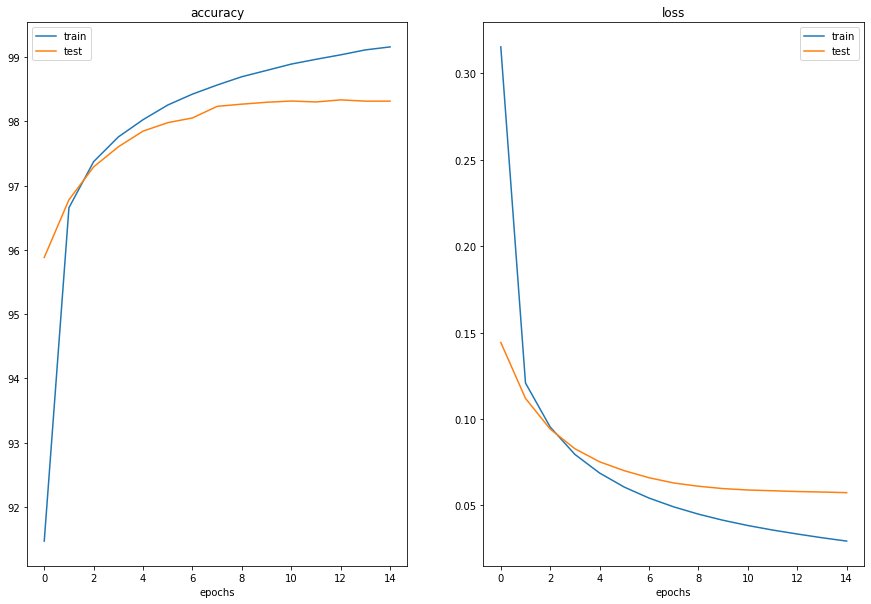

In [ ]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(15,10))
axes[0].plot(log['train_accuracy'])
axes[0].plot(log['test_accuracy'])
axes[0].legend(['train', 'test'])
axes[0].set_title("accuracy")
axes[0].set(xlabel='epochs')

axes[1].plot(log['train_loss'])
axes[1].plot(log['test_loss'])
axes[1].legend(['train', 'test'])
axes[1].set_title("loss")
axes[1].set(xlabel='epochs')


### Learning Rate = 0.0001

In [ ]:
INPUT_SHAPE = 25*25
LEARNING_RATE = 0.0001
EPOCHS = 15
TRAINLOADER = Dataloader(x_train, y_train, n_classes=10, batch_size=32, shuffle=False)
TESTLOADER = Dataloader(x_test, y_test, n_classes=10, batch_size=32, shuffle=False)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=30, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(n_neurons=10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results=True)

Epoch 1:
	Train: Average Accuracy: 0.5860062524423604	Average Loss: 1.2827152680939435
	Test: Average Accuracy: 0.8546705163043479	Average Loss: 0.5086518588707334
Epoch 2:
	Train: Average Accuracy: 0.8933406604142243	Average Loss: 0.3668909541789267
	Test: Average Accuracy: 0.9190726902173914	Average Loss: 0.2873625171678838
Epoch 3:
	Train: Average Accuracy: 0.9313716295427902	Average Loss: 0.2478204883478615
	Test: Average Accuracy: 0.9345023777173914	Average Loss: 0.22954799617355365
Epoch 4:
	Train: Average Accuracy: 0.9416661781946073	Average Loss: 0.2089122490999071
	Test: Average Accuracy: 0.9406547214673914	Average Loss: 0.20441074505885454
Epoch 5:
	Train: Average Accuracy: 0.9467707112153185	Average Loss: 0.18929488793975335
	Test: Average Accuracy: 0.9453910495923914	Average Loss: 0.18966906768704955
Epoch 6:
	Train: Average Accuracy: 0.9499579914028918	Average Loss: 0.17694809442568007
	Test: Average Accuracy: 0.9489555027173914	Average Loss: 0.17977869182084438
Epoch 7:
	

[Text(0.5, 0, 'epochs')]

<Figure size 432x288 with 0 Axes>

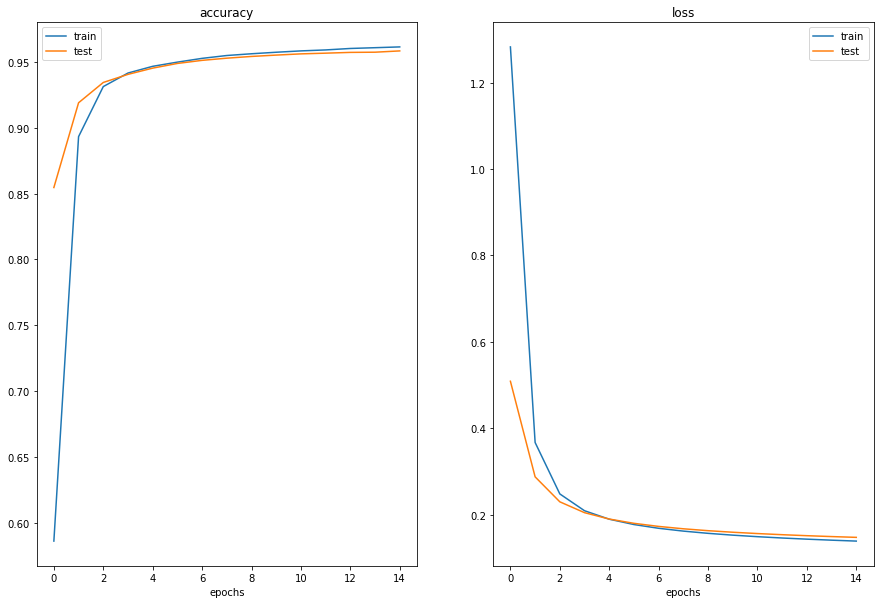

In [ ]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(15,10))
axes[0].plot(log['train_accuracy'])
axes[0].plot(log['test_accuracy'])
axes[0].legend(['train', 'test'])
axes[0].set_title("accuracy")
axes[0].set(xlabel='epochs')

axes[1].plot(log['train_loss'])
axes[1].plot(log['test_loss'])
axes[1].legend(['train', 'test'])
axes[1].set_title("loss")
axes[1].set(xlabel='epochs')


### D) Affection of Activition Function

#### Sigmoid

In [ ]:
import time
t0 = time.time()
TRAINLOADER = [batch for batch in Dataloader(x_train, y_train, n_classes=10, batch_size=BATCH_SIZE, shuffle=False)]
TESTLOADER = [batch for batch in Dataloader(x_test, y_test, n_classes=10, batch_size=BATCH_SIZE, shuffle=False)]

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=30, activation=Sigmoid(), initial_weight='uniform')
network.add_layer(n_neurons=10, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results=True)
t1 = time.time()

Epoch 1:
	Train: Average Accuracy: 9.986615865572489	Average Loss: 2.3116560522330336
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.3101820836925038
Epoch 2:
	Train: Average Accuracy: 37.83621531848378	Average Loss: 1.7537202499697677
	Test: Average Accuracy: 77.53333050271739	Average Loss: 1.0565648823407467
Epoch 3:
	Train: Average Accuracy: 82.41920672137553	Average Loss: 0.6982916208544558
	Test: Average Accuracy: 90.52055027173913	Average Loss: 0.4588293925682905
Epoch 4:
	Train: Average Accuracy: 92.2866842516608	Average Loss: 0.34708696521301574
	Test: Average Accuracy: 92.99613620923913	Average Loss: 0.28728474750619587
Epoch 5:
	Train: Average Accuracy: 93.75942751074639	Average Loss: 0.2533194946277355
	Test: Average Accuracy: 93.90922214673913	Average Loss: 0.23509226667652428
Epoch 6:
	Train: Average Accuracy: 94.50889019148104	Average Loss: 0.21464535160534282
	Test: Average Accuracy: 94.48539402173913	Average Loss: 0.2082321332572247
Epoch 7:
	Train: Average

In [ ]:
print("time taken with sigmoid activation function:",t1-t0)

time taken with sigmoid activation function: 352.6741843223572


[Text(0.5, 0, 'epochs')]

<Figure size 432x288 with 0 Axes>

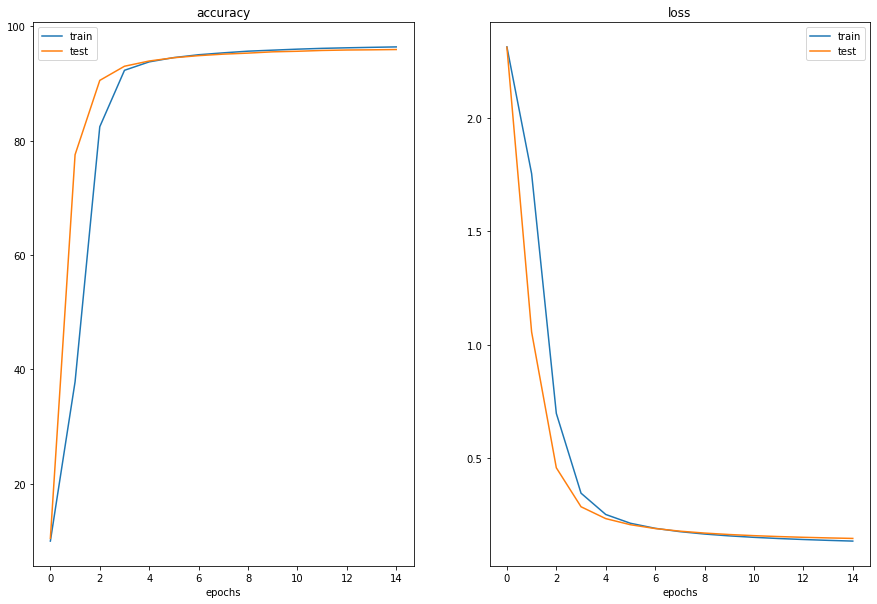

In [ ]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(15,10))
axes[0].plot(log['train_accuracy'])
axes[0].plot(log['test_accuracy'])
axes[0].legend(['train', 'test'])
axes[0].set_title("accuracy")
axes[0].set(xlabel='epochs')

axes[1].plot(log['train_loss'])
axes[1].plot(log['test_loss'])
axes[1].legend(['train', 'test'])
axes[1].set_title("loss")
axes[1].set(xlabel='epochs')


## Tanh


In [ ]:
import time
t0 = time.time()
TRAINLOADER = [batch for batch in Dataloader(x_train, y_train, n_classes=10, batch_size=BATCH_SIZE, shuffle=False)]
TESTLOADER = [batch for batch in Dataloader(x_test, y_test, n_classes=10, batch_size=BATCH_SIZE, shuffle=False)]

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=30, activation=Tanh(), initial_weight='uniform')
network.add_layer(n_neurons=10, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results=True)
t1 = time.time()

Epoch 1:
	Train: Average Accuracy: 9.969519343493552	Average Loss: 2.3123084674427448
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.312343199318265
Epoch 2:
	Train: Average Accuracy: 9.97562524423603	Average Loss: 2.3123167196234182
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.312340642565039
Epoch 3:
	Train: Average Accuracy: 9.976846424384526	Average Loss: 2.312313995210087
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.312337761536724
Epoch 4:
	Train: Average Accuracy: 9.976846424384526	Average Loss: 2.312310858837944
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.31233438423628
Epoch 5:
	Train: Average Accuracy: 9.976846424384526	Average Loss: 2.31230708660213
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.312330234500691
Epoch 6:
	Train: Average Accuracy: 9.976846424384526	Average Loss: 2.3123022966647055
	Test: Average Accuracy: 10.471509850543478	Average Loss: 2.312324817458505
Epoch 7:
	Train: Average Accuracy:

In [ ]:
print("time taken with tanh activation function:",t1-t0)

time taken with tanh activation function: 352.10930132865906


[Text(0.5, 0, 'epochs')]

<Figure size 432x288 with 0 Axes>

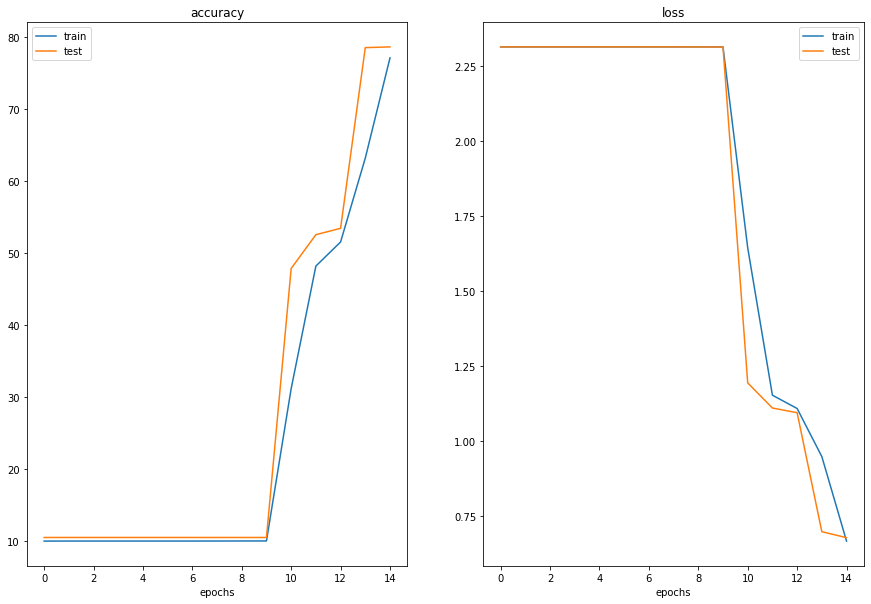

In [ ]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(15,10))
axes[0].plot(log['train_accuracy'])
axes[0].plot(log['test_accuracy'])
axes[0].legend(['train', 'test'])
axes[0].set_title("accuracy")
axes[0].set(xlabel='epochs')

axes[1].plot(log['train_loss'])
axes[1].plot(log['test_loss'])
axes[1].legend(['train', 'test'])
axes[1].set_title("loss")
axes[1].set(xlabel='epochs')


### LeakyReLU 

In [ ]:
import time
t0 = time.time()
TRAINLOADER = [batch for batch in Dataloader(x_train, y_train, n_classes=10, batch_size=BATCH_SIZE, shuffle=False)]
TESTLOADER = [batch for batch in Dataloader(x_test, y_test, n_classes=10, batch_size=BATCH_SIZE, shuffle=False)]

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=30, activation=LeakyRelu(), initial_weight='uniform')
network.add_layer(n_neurons=10, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results=True)
t1 = time.time()

Epoch 1:
	Train: Average Accuracy: 91.31374560375147	Average Loss: 0.3206982124676803
	Test: Average Accuracy: 95.78910495923913	Average Loss: 0.14958425655199092
Epoch 2:
	Train: Average Accuracy: 96.48910707307542	Average Loss: 0.12673768212809394
	Test: Average Accuracy: 96.80472995923913	Average Loss: 0.11430794504409061
Epoch 3:
	Train: Average Accuracy: 97.38545330207113	Average Loss: 0.09601649453165179
	Test: Average Accuracy: 97.35648777173913	Average Loss: 0.09365463674933494
Epoch 4:
	Train: Average Accuracy: 97.83973231731144	Average Loss: 0.07823793201099499
	Test: Average Accuracy: 97.63480808423913	Average Loss: 0.08210364025487095
Epoch 5:
	Train: Average Accuracy: 98.09373778819851	Average Loss: 0.06686088027612998
	Test: Average Accuracy: 97.77640964673913	Average Loss: 0.07506817619670865
Epoch 6:
	Train: Average Accuracy: 98.30255959359124	Average Loss: 0.05875709073452978
	Test: Average Accuracy: 97.93265964673913	Average Loss: 0.069965525701082
Epoch 7:
	Train: Av

In [ ]:
print("time taken with leakyrelu activation function:",t1-t0)

time taken with leakyrelu activation function: 348.3432686328888


[Text(0.5, 0, 'epochs')]

<Figure size 432x288 with 0 Axes>

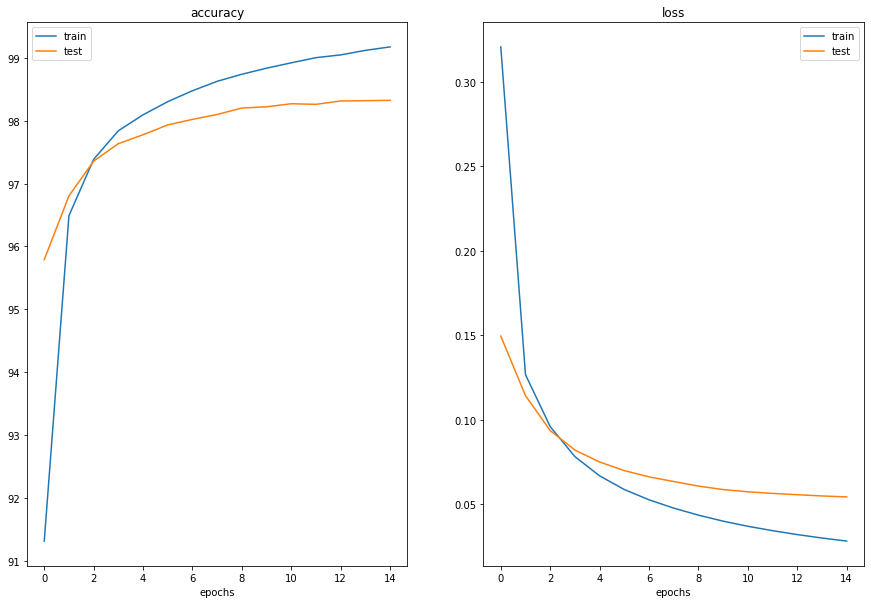

In [ ]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(15,10))
axes[0].plot(log['train_accuracy'])
axes[0].plot(log['test_accuracy'])
axes[0].legend(['train', 'test'])
axes[0].set_title("accuracy")
axes[0].set(xlabel='epochs')

axes[1].plot(log['train_loss'])
axes[1].plot(log['test_loss'])
axes[1].legend(['train', 'test'])
axes[1].set_title("loss")
axes[1].set(xlabel='epochs')


### E) Affection of Batch Size
#### batch_size = 16

In [ ]:
BATCH_SIZE = 16

In [ ]:
TRAINLOADER = [batch for batch in Dataloader(x_train, y_train, n_classes=10, batch_size=BATCH_SIZE, shuffle=False)]
TESTLOADER = [batch for batch in Dataloader(x_test, y_test, n_classes=10, batch_size=BATCH_SIZE, shuffle=False)]

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=30, activation=LeakyRelu(), initial_weight='uniform')
network.add_layer(n_neurons=10, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results=True)

Epoch 1:
	Train: Average Accuracy: 91.07195193434936	Average Loss: 0.3099919225465764
	Test: Average Accuracy: 95.9375	Average Loss: 0.1480392134392654
Epoch 2:
	Train: Average Accuracy: 96.6295427901524	Average Loss: 0.12370591379353645
	Test: Average Accuracy: 96.953125	Average Loss: 0.11018277877948879
Epoch 3:
	Train: Average Accuracy: 97.45017584994139	Average Loss: 0.0941687411753295
	Test: Average Accuracy: 97.5341796875	Average Loss: 0.08885751911555137
Epoch 4:
	Train: Average Accuracy: 97.8800312622118	Average Loss: 0.07656282986564734
	Test: Average Accuracy: 97.8466796875	Average Loss: 0.07653241345770831
Epoch 5:
	Train: Average Accuracy: 98.16212387651426	Average Loss: 0.06520844699760131
	Test: Average Accuracy: 98.046875	Average Loss: 0.0684425465187825
Epoch 6:
	Train: Average Accuracy: 98.3453008987886	Average Loss: 0.057141582643479245
	Test: Average Accuracy: 98.1982421875	Average Loss: 0.0633286057948895
Epoch 7:
	Train: Average Accuracy: 98.54313208284486	Average 

[Text(0.5, 0, 'epochs')]

<Figure size 432x288 with 0 Axes>

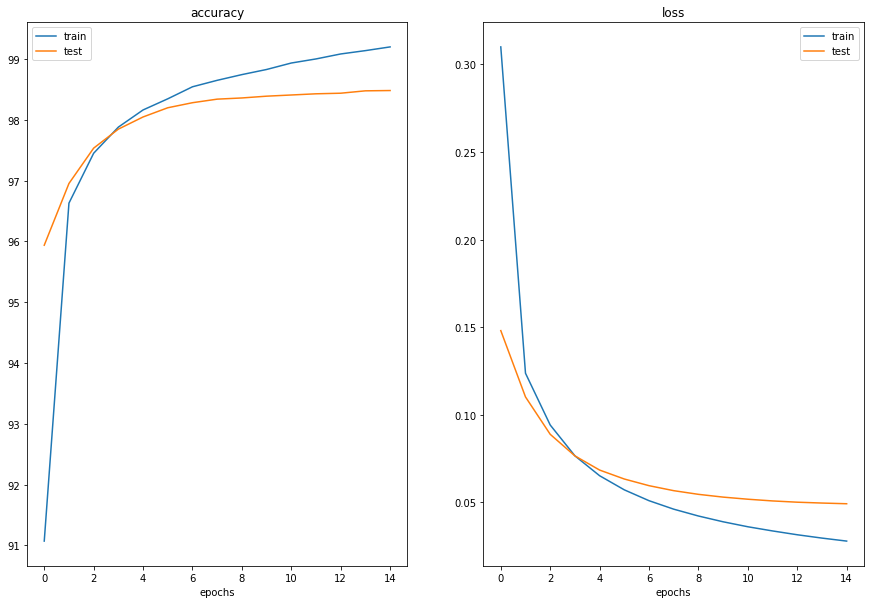

In [ ]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(15,10))
axes[0].plot(log['train_accuracy'])
axes[0].plot(log['test_accuracy'])
axes[0].legend(['train', 'test'])
axes[0].set_title("accuracy")
axes[0].set(xlabel='epochs')

axes[1].plot(log['train_loss'])
axes[1].plot(log['test_loss'])
axes[1].legend(['train', 'test'])
axes[1].set_title("loss")
axes[1].set(xlabel='epochs')


In [ ]:
BATCH_SIZE = 256

In [ ]:
TRAINLOADER = [batch for batch in Dataloader(x_train, y_train, n_classes=10, batch_size=BATCH_SIZE, shuffle=False)]
TESTLOADER = [batch for batch in Dataloader(x_test, y_test, n_classes=10, batch_size=BATCH_SIZE, shuffle=False)]

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=30, activation=LeakyRelu(), initial_weight='uniform')
network.add_layer(n_neurons=10, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results=True)

Epoch 1:
	Train: Average Accuracy: 18.445465509792626	Average Loss: 2.26492197252636
	Test: Average Accuracy: 23.960692370951417	Average Loss: 2.047323548349774
Epoch 2:
	Train: Average Accuracy: 27.5665030061924	Average Loss: 2.0027071762755013
	Test: Average Accuracy: 37.05809558451417	Average Loss: 1.8274022390536842
Epoch 3:
	Train: Average Accuracy: 55.908934421802996	Average Loss: 1.2346967357919516
	Test: Average Accuracy: 67.34327555668017	Average Loss: 0.8726362346308555
Epoch 4:
	Train: Average Accuracy: 68.65965671802995	Average Loss: 0.9399610203051736
	Test: Average Accuracy: 79.84426398026315	Average Loss: 0.7052317761952995
Epoch 5:
	Train: Average Accuracy: 77.42020426807315	Average Loss: 0.7273741817530107
	Test: Average Accuracy: 82.70159887398786	Average Loss: 0.6109505172092909
Epoch 6:
	Train: Average Accuracy: 82.24107592885944	Average Loss: 0.5881284770520819
	Test: Average Accuracy: 87.48454105516194	Average Loss: 0.4632494609891265
Epoch 7:
	Train: Average Accu

[Text(0.5, 0, 'epochs')]

<Figure size 432x288 with 0 Axes>

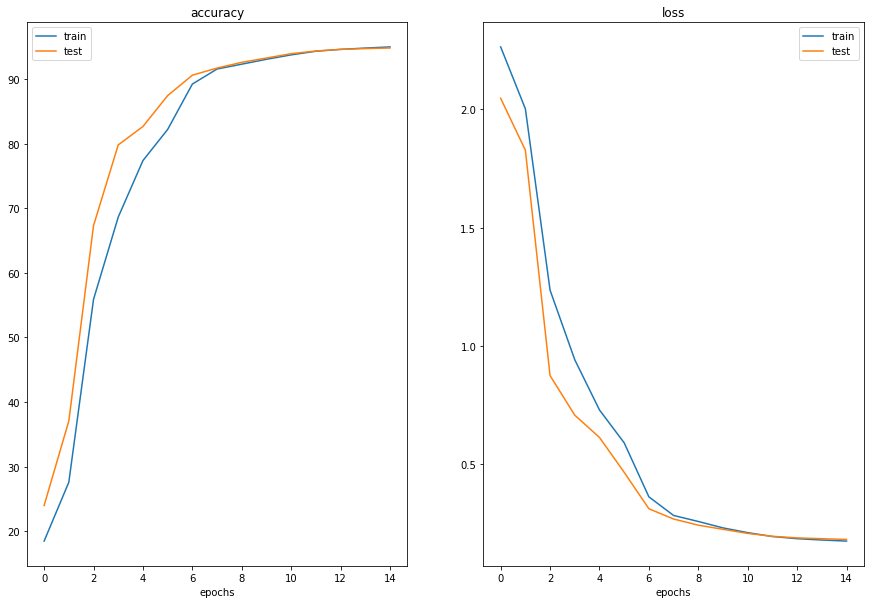

In [ ]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(15,10))
axes[0].plot(log['train_accuracy'])
axes[0].plot(log['test_accuracy'])
axes[0].legend(['train', 'test'])
axes[0].set_title("accuracy")
axes[0].set(xlabel='epochs')

axes[1].plot(log['train_loss'])
axes[1].plot(log['test_loss'])
axes[1].legend(['train', 'test'])
axes[1].set_title("loss")
axes[1].set(xlabel='epochs')
